# Configuración Física del Océano
La tierra es un elipsoide oblato, con un radio ecuatorial R<sub>e</sub>= 6,378.1349 Km y un radio polar R<sub>p</sub>=6,356.7497 Km (West,1992).
Para ubicarse de manera ordenada, se utiliza un sistema de coordenadas geográficas sobre un un elipsoide conocido. Este sistema utiliza las siguientes denominaciones:

**Latitud** para los ángulos entre el plano ecuatorial y un plano vertical sobre un punto en el elipsoide.

**Longitud** para medir en ángulo entre el meridiano de Greenwich y otros meridianos.

![Image of Yaktocat](https://www.icsm.gov.au/sites/default/files/inline-images/spheroid_height_0.jpg)
https://www.icsm.gov.au/education/fundamentals-mapping/datums/datums-explained-more-detail

La información batimétrica del océano se encuentra compilada en diferentes proyectos: ETOPO, GEBCO, GMRT; la mayoría en formatos binarios. Esta información se encuentra "engrillada" en coordenadas de latitud y longitud. Para una correcta visualización de está información es necesario utilizar un sistema de proyección geográfica.

In [72]:
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

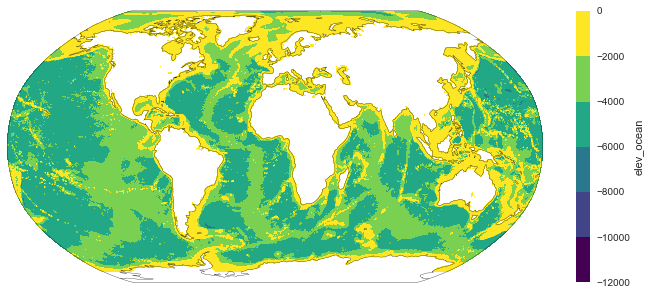

In [94]:
ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO5/dods')
ds = ds.rename({'X': 'lon', 'Y': 'lat'})
ds['elev_ocean'] = ds.elev.where(ds.elev<0).load()
ax = plt.axes(projection=ccrs.Robinson())
ds.elev_ocean.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

El océano cubre el 70.8% de la superficie de la Tierra, unos 361,254,000 $Km^{2}$.
De acuerdo al Proyecto ETOPO5 (datos cada 5'), la profundidad media del océano es de 3420.6 metros. La mayor profundidad a 10376 metros. Este último, probablemente en la Fosa de las Marianas, lugar dónde se ha medido las máximas profundidades del océano.

In [91]:
ds.elev_ocean.mean(), ds.elev_ocean.min()

(<xarray.DataArray 'elev_ocean' ()>
 array(-3420.688720119606), <xarray.DataArray 'elev_ocean' ()>
 array(-10376.0))

Existe un único océano, dividido en tres partes: Atlántico, Pacífico e Indico (International Hydrographic Bureau, 1953).
Superficie del océano (Menard & Smith, 1966)

Océano | Área|
--- | --- |
*Pacífico* | 181.34 x $10^{6} km^{2}$ |
*Atlántico* |  106.57 x $10^{6} km^{2}$ |
*Índico* |  106.57 x $10^{6} km^{2}$ |


## Océano Atlántico
Se extiende desde la Antártida hasta el mar Ártico. Incluye: el Mediterráneo europeo y el mar Caribe. Se divide del Índico por el meridiano que pasa por el Cabo de las Agujas ($20^{o}E$), y con el Pacífico por la distancia más corta entre el Cabo de Hornos y las islas Shetlands del Sur. Destaca en su franja central su dorsal (i.e. dorsal mesoatlántica).

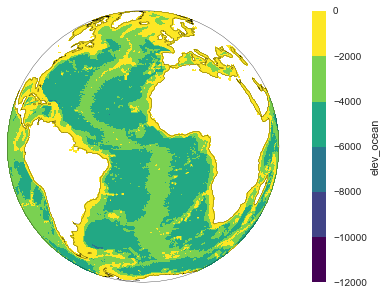

In [92]:
ax = plt.axes(projection=ccrs.Orthographic(-20, 0))
ds.elev_ocean.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

## Océano Pacífico
Se extiende desde la Antártida hasta el Estrecho de Bering. Se divide del Índico por el meridiano $147^{o}E$ desde el Cabo Sudeste de Tasmania hasta la Antártida.

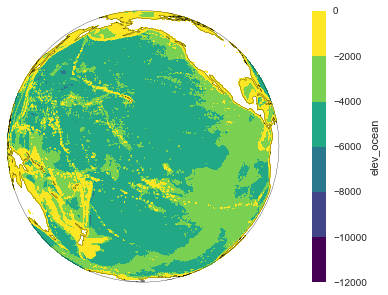

In [101]:
ax = plt.axes(projection=ccrs.Orthographic(-150, 0))
ds.elev_ocean.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

## Océano Índico
Se extiende desde la Antártida hasta el continente Asiático, incluye al Mar Rojo y al Golfo Pérsico.

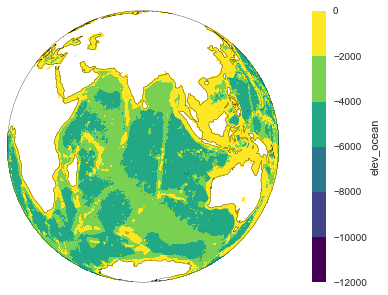

In [102]:
ax = plt.axes(projection=ccrs.Orthographic(80, -10))
ds.elev_ocean.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

# EL OCÉANO ES UNA PEQUEÑA LÁMINA DE AGUA QUE RODEA LA TIERRA
Considerando que la profundidad media del océano oscila entre 3 - 4 Km, las dimensiones horizontales son miles de veces mas grandes que las dimensiones verticales.
A continuación se muestra un gráfico típico de batimetría, donde usualmente se exagera la profundidad


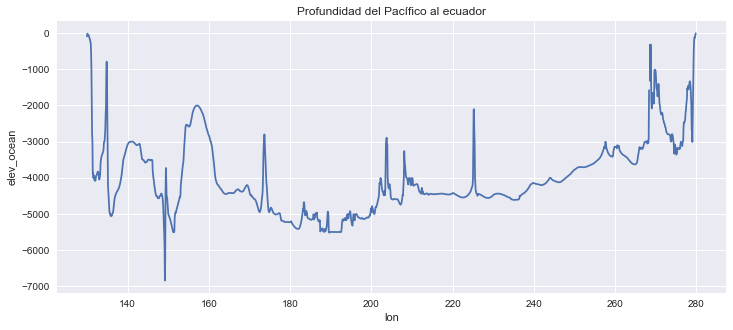

In [137]:
fig, ax = plt.subplots()
ds.elev_ocean.sel(lat=0, method='nearest').sel(lon=slice(130,300)).plot(ax=ax)
ax.set_title('Profundidad del Pacífico al ecuador');

Sin embargo, si se utiliza la misma escala tanto para la profundidad como para el plano del ecuador, entonces el gráfico, aunque más realista, no permite diferenciar los valores de profundiad.

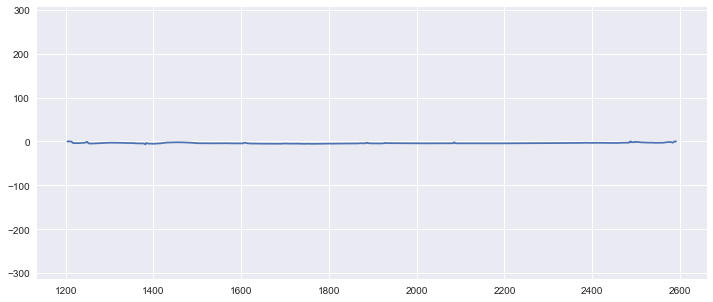

([<matplotlib.lines.Line2D at 0x7fe34f18ae80>],
 (1134.4226196289062,
  2660.6186401367186,
  -7.1804500000000004,
  0.33145000000000002),
 None)

In [192]:
prof=ds.elev_ocean.sel(lat=0, method='nearest').sel(lon=slice(130,300))
#Tranformación gruesa
dx=0.083333*60*1.852
dlo=dx*prof.lon
plt.plot(dlo,prof/1000),plt.axis('equal'),plt.show()

# MORFOLOGÍA SUBMARINA 
## Fosa de las Marianas

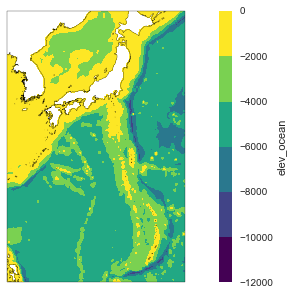

In [201]:
ax = plt.axes(projection=ccrs.Mercator())
ds.elev_ocean.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([124, 150, 10, 44])
ax.coastlines(resolution='10m')

# TAREA
Identifique y grafique las siguientes áreas:
1. Cordillera submarina de Carnegie*
2. Zona Clarion-Cliperton*
3. Cordillera Submarina del Coco*
4. Cordillera de Colón*
5. Mar de Coral
6. Cordillera de Azores 

*Detalle las características más importantes.